# Scenario-3: Ergo Plastics
Ergo plastics was found in 1973, one of the oldest and largest plastic manufacturing industry across the world. They have been developing in a new plastic materials which can withstand high pressure and temperature. They have created a 2 new type of materials and based on their elasticity and ductility the data has been collected. The data has been collected based on the material strength

## Problem Statement:

    They have collected the data in a csv format. Task is to classify a given piece of plastic based on its strength.

### Dataset Description:

    Attributes:
      elasticity: real 
      ductility: real

    Target Variable:
      type: tensal, brittle
      
#### Tasks to be Performed:

    In order to attain the above goal below tasks must be performed:
      Read the dataset and process all the missing values. - Beginner
      Split the data in training and testing set; then apply support vector classifier-Beginner
      Find the accuracy of the model and plot the confusion matrix. Intermediate 
      Plot the visualization of the model to check the boundaries. Advanced

##### Topics Covered:

    Support Vector Machine



### Question-1: Read the dataset and process all the missing values. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('plastics_type.csv')
data.head()

,elasticity,ductility,type
0,29.19393,8.443208,tensil
1,28.04907,7.237035,tensil
2,26.90421,7.719504,tensil
3,26.33178,7.478270,tensil
4,28.62150,8.684442,tensil


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elasticity  154 non-null    float64
 1   ductility   152 non-null    float64
 2   type        155 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [4]:
data.isnull().sum()

elasticity    1
ductility     3
type          0
dtype: int64

In [5]:
data.describe(include='all')

,elasticity,ductility,type
count,154.000000,152.000000,155
unique,NaN,NaN,2
top,NaN,NaN,brittle
freq,NaN,NaN,79
mean,33.427861,7.357653,NaN
std,4.702495,1.049866,NaN
min,24.614490,4.824690,NaN
25%,29.193930,6.754566,NaN
50%,33.200940,7.237035,NaN
75%,36.635520,7.960739,NaN


###### Checking and processing Null values

In [6]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?':
                            [any(data[x].isnull()) for x in data.columns],
                  'Count_' :[sum(data[y].isnull()) for y in data.columns],
                            'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing value?,Count_,Percentage
1,ductility,True,3,0.019355
0,elasticity,True,1,0.006452
2,type,False,0,0.000000


In [7]:
print("Total Missing Values: %s"%sum(miss.Count_))

Total Missing Values: 4


In [8]:
data.ductility=data.ductility.fillna(data.ductility.mean())
data.elasticity=data.elasticity.fillna(data.elasticity.mean())

In [9]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?':
                            [any(data[x].isnull()) for x in data.columns],
                  'Count_' :[sum(data[y].isnull()) for y in data.columns],
                            'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing value?,Count_,Percentage
0,elasticity,False,0,0.0
1,ductility,False,0,0.0
2,type,False,0,0.0


### Question-2: Split the data in training and testing set; then apply support vector classifier.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC

In [11]:
lb=LabelEncoder()
data.type=lb.fit_transform(data.type)

In [12]:
X=data.drop('type', axis=1)
y=data.type 
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, test_size=0.3)

In [13]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)

SVC()

In [14]:
rbf_pred=model_rbf.predict(X_test)

In [15]:
model_linear=SVC(kernel='linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
Linear_pred=model_linear.predict(X_test)

In [17]:
model_sigmoid=SVC(kernel='sigmoid')
model_sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [18]:
Sigmoid_pred=model_sigmoid.predict(X_test)

### Question-3: Find the accuracy of the model and plot the confusion matrix.

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [20]:
print("The accuracy of the linear model is:",round(accuracy_score(y_test, Linear_pred)*100,2)) 
print("The accuracy of the rbf model is:",round(accuracy_score(y_test, rbf_pred)*100,2)) 
print("The accuracy of the sigmoid model is:", round(accuracy_score(y_test, Sigmoid_pred)*100,2))

The accuracy of the linear model is: 82.98
The accuracy of the rbf model is: 82.98
The accuracy of the sigmoid model is: 40.43


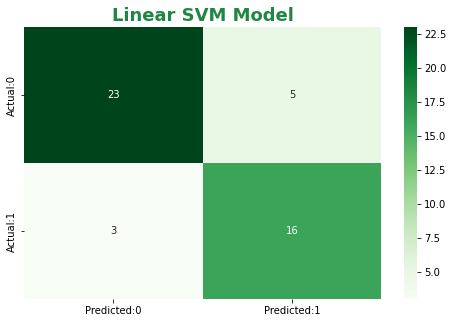

In [21]:
lcm=confusion_matrix(y_test, Linear_pred)
lconf_matrix=pd.DataFrame(data=lcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8,5)) 
sns.heatmap(lconf_matrix, annot=True, fmt='d',cmap='Greens') 
fm={'size' :18, 'color': '#1f8742', 'weight': 'heavy'} 
plt.title('Linear SVM Model', **fm) 
plt.show()

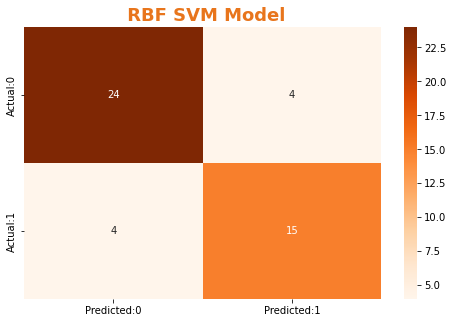

In [22]:
lcm=confusion_matrix(y_test,  rbf_pred)
lconf_matrix=pd.DataFrame(data=lcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8,5)) 
sns.heatmap(lconf_matrix, annot=True, fmt='d',cmap='Oranges') 
fm={'size' :18, 'color': '#E8751C', 'weight': 'heavy'} 
plt.title(' RBF SVM Model', **fm) 
plt.show()

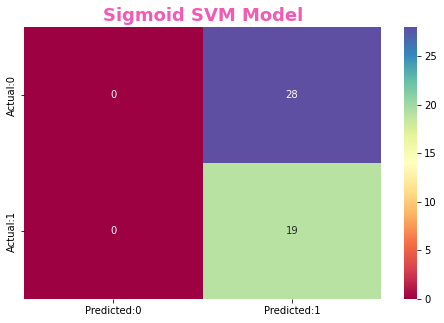

In [23]:
lcm=confusion_matrix(y_test,  Sigmoid_pred)
lconf_matrix=pd.DataFrame(data=lcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8,5)) 
sns.heatmap(lconf_matrix, annot=True, fmt='d',cmap='Spectral') 
fm={'size' :18, 'color': '#F15BB5', 'weight': 'heavy'} 
plt.title('Sigmoid SVM Model', **fm) 
plt.show()

In [24]:
from matplotlib.gridspec import GridSpec
def plot_models(data):
    sns.set_palette(sns.color_palette("rocket")) 
    super_title={'size':18, 'color':'#c5283d','weight':'bold'}
    sub_title={'size':12, 'color': '#e06777', 'weight':'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 238], [184, 190, 221],[231, 115, 171]]) 
    colors=colors/255 #Matplotlib RGB color range is from 0-1
    data=pd.DataFrame(data)
    fig=plt.figure(figsize=(10,7),constrained_layout=True)
    gs=GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(data.Model,data.Accuracy,color=colors) 
    ax1.tick_params(labelbottom=False, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('Accuracy',**sub_title)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model,data.Precision,color=colors) 
    ax2.tick_params(labelbottom=False, labelleft=False)
    ax2.set_xlim(0,1)
    ax2.set_title('Precision',**sub_title) 
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.barh(data.Model,data.Recall,color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,1)
    ax3.set_title('Recall',**sub_title)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.barh(data.Model,data.F1_score,color=colors) 
    ax4.tick_params(labelbottom=False, labelleft=False)
    ax4.set_xlim(0,1)
    ax4.set_title('F1_Score',**sub_title)
    fig.suptitle("Evaluation",**super_title)
    ax4.tick_params(labelbottom=True, labelleft=False)
    plt.show()

In [25]:
# Let's see precision and recall values 
#Initializae the evaluation dictionary 
def initialize_evaluator():
    return {'Model':[], 'Accuracy': [], 'Precision': [], 'Recall' : [], 'F1_score':[]}

#Insert data in evaluation dictionary
def insert_data(test, pred,model):
    eval_data=initialize_evaluator()
    eval_data['Accuracy'].append(accuracy_score(test, pred)) 
    eval_data['Precision'].append(precision_score (test, pred))
    eval_data['Model'].append(model)
    eval_data['Recall'].append(recall_score (test, pred)) 
    eval_data['F1_score'].append(f1_score(test, pred)) 
    return eval_data
#Append data of one dictionary to another
def append_data(data1, data2): 
    for i in data1.keys(): 
        data2[i].extend(data1[i]) 
    return data2

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
from sklearn.metrics import classification_report, f1_score 

In [27]:
eval_rbf=insert_data(y_test,rbf_pred,'RBG SVM')
eval_lin=insert_data(y_test,Linear_pred, 'Linear SVM') 
eval_sig=insert_data(y_test,Sigmoid_pred, 'Sigmoid SVM') 
eval_svm=append_data(eval_rbf, eval_lin) 
eval_svm=append_data(eval_sig, eval_svm)

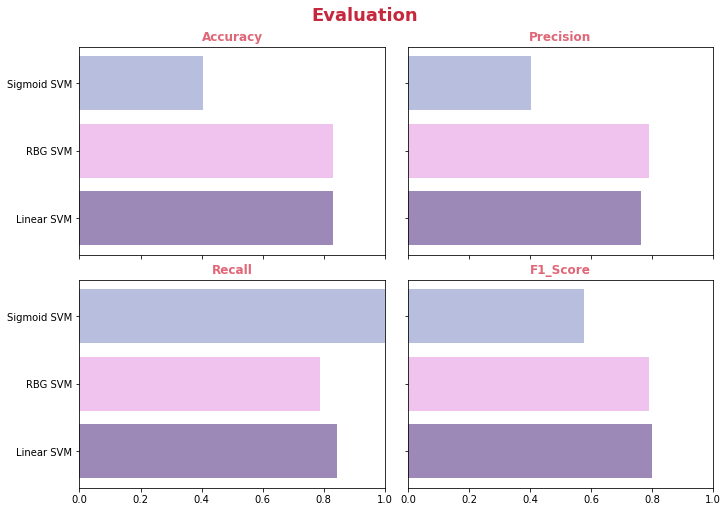

In [28]:
plot_models(eval_svm)

From above graph we can conclude that Linear SVM model is best.

### Question-4: Plot the visualization of the model to check the boundaries.

In [29]:
def plot(X,y,model,m):
    p=['tensil','brittle']
    X=np.array(X)
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min()-1, stop = X[:, 0].max()+ 1, step = 0.01),
                         np.arange(start = X[:, 1].min()-1, stop = X[:, 1].max()+ 1, step = 0.01))
    #To plot boundaries
    #In general, the space is divided into decision boundaries
    plt.figure(figsize=(8,6))
    Z=model.decision_function(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) 
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.25, cap=ListedColormap(('3889bce', '#004e64')))
    plt.contour(X1, X2, Z, colors=['k', 'k', 'k'],linestyles=['-.','-','-.'],levels=[-.7,0,.7])
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    X=X.ravel() 
    clr=[]
    for i in y:
        if i==0:
            clr.append('#ff499e')
        else:
            clr.append('#6f2dbd')
    plt.scatter(X[::2], X[1::2],y,c=clr, cmap=ListedColormap(('#ffaabb', '#23887A'))) 
    fm={'size' :18, 'color': '#436B95',"weight":"bold"}
    plt.title(m,**fm)
    plt.xlabel('Elasticity')
    plt.ylabel('Ductility') 
    plt.xticks([])
    plt.yticks([])
    return plt

##### Linear

In [30]:
import warnings
warnings. filterwarnings("ignore")

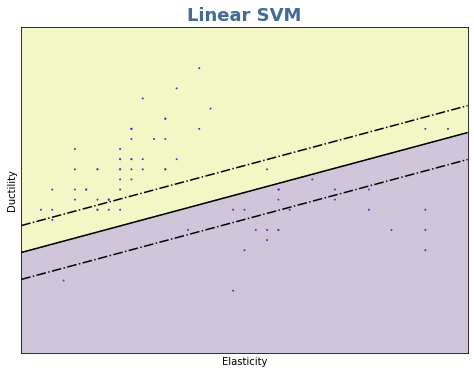

In [31]:
plot(np.array(X),np.array(y),model_linear,'Linear SVM')
plt.show()

<AxesSubplot:>

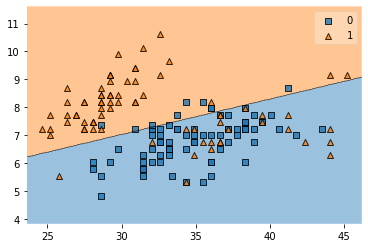

In [36]:
from mlxtend.plotting import plot_decision_regions
#we can also use plot_decision_regions function
plot_decision_regions(np.array(X),np.array(y),clf=model_linear)

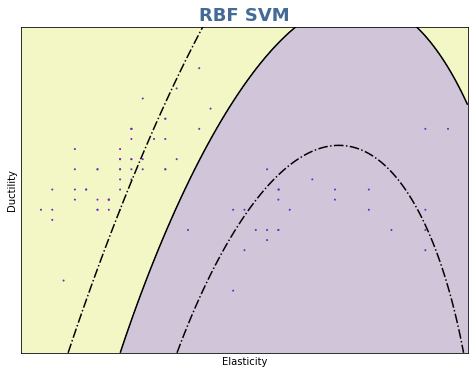

In [34]:
plot(np.array(X),np.array(y),model_rbf,'RBF SVM')
plt.show()

<AxesSubplot:>

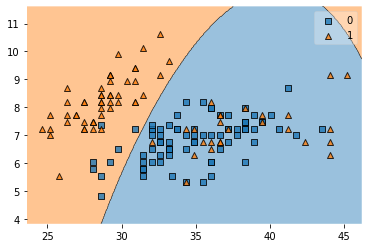

In [38]:
#we can also use plot_decision_regions function
plot_decision_regions(np.array(X),np.array(y),clf=model_rbf)

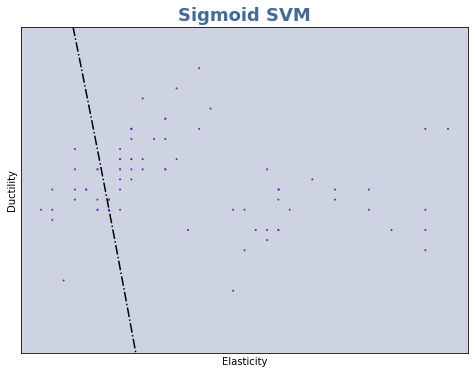

In [41]:
plot(np.array(X),np.array(y),model_sigmoid,'Sigmoid SVM')
plt.show()

<AxesSubplot:>

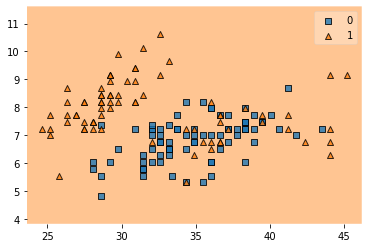

In [42]:
#we can also use plot_decision_regions function
plot_decision_regions(np.array(X),np.array(y),clf=model_sigmoid)